# 4.1 Basic AE model

## 1. Using CIFAR10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

from sklearn import model_selection

2023-06-02 12:27:32.292606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 12:27:32.426101: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-02 12:27:32.980055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dnc/cuda/lib64:xxx/cuda/lib64:/usr/local/cuda-11.2/lib64
2023-06-02 12:27:32.9801

In [2]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
from sklearn.preprocessing import LabelBinarizer

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [6]:
from keras import layers, models

input_shape = (32,32,3)

input = layers.Input(input_shape)
encoder1 = layers.Dense(600, activation='relu')(input)
encoder2 = layers.Dense(300, activation='relu')(encoder1)
encoder3 = layers.Dense(100, activation='relu')(encoder2)

decoder1 = layers.Dense(300, activation='relu')(encoder3)
decoder2 = layers.Dense(600, activation='relu')(decoder1)
output = layers.Dense(3, activation='relu')(decoder2)

AE = models.Model(input, output)
AE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
AE.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 dense_6 (Dense)             (None, 32, 32, 600)       2400      
                                                                 
 dense_7 (Dense)             (None, 32, 32, 300)       180300    
                                                                 
 dense_8 (Dense)             (None, 32, 32, 100)       30100     
                                                                 
 dense_9 (Dense)             (None, 32, 32, 300)       30300     
                                                                 
 dense_10 (Dense)            (None, 32, 32, 600)       180600    
                                                                 
 dense_11 (Dense)            (None, 32, 32, 3)         1803

In [7]:
history = AE.fit(x_train_scaled, x_train_scaled, validation_data = [x_test_scaled, x_test_scaled], batch_size=32, epochs = 5)

Epoch 1/5


2023-06-02 12:29:38.147421: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-02 12:29:38.155341: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x29603f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-02 12:29:38.155378: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-06-02 12:29:38.155387: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-06-02 12:29:38.164076: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-02 12:29:38.268395: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged 

1563/1563 [==============================] - 27s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 7.3002e-06 - val_mean_squared_error: 7.3002e-06
Epoch 2/5
1563/1563 [==============================] - 24s 15ms/step - loss: 2.6271e-05 - mean_squared_error: 2.6271e-05 - val_loss: 2.5845e-06 - val_mean_squared_error: 2.5845e-06
Epoch 3/5
1563/1563 [==============================] - 24s 15ms/step - loss: 2.1980e-05 - mean_squared_error: 2.1980e-05 - val_loss: 8.7746e-05 - val_mean_squared_error: 8.7746e-05
Epoch 4/5
1563/1563 [==============================] - 24s 15ms/step - loss: 2.4281e-05 - mean_squared_error: 2.4281e-05 - val_loss: 7.2845e-07 - val_mean_squared_error: 7.2845e-07
Epoch 5/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5988e-05 - mean_squared_error: 1.5988e-05 - val_loss: 5.1638e-06 - val_mean_squared_error: 5.1638e-06


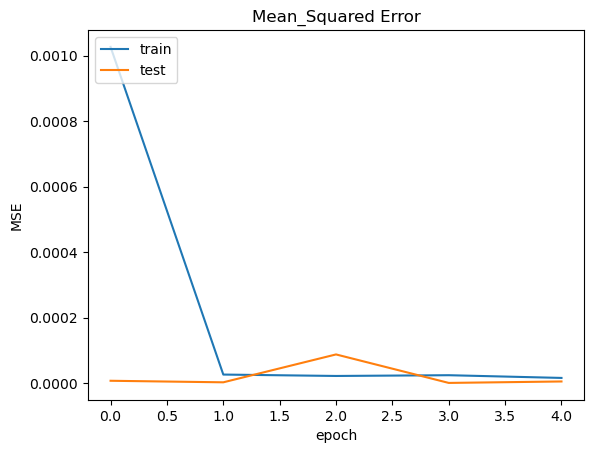

In [8]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean_Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [9]:
decoded_img = AE.predict(x_train_scaled[1].reshape(-1, 32, 32, 3))

1/1 [==============================] - 0s 283ms/step


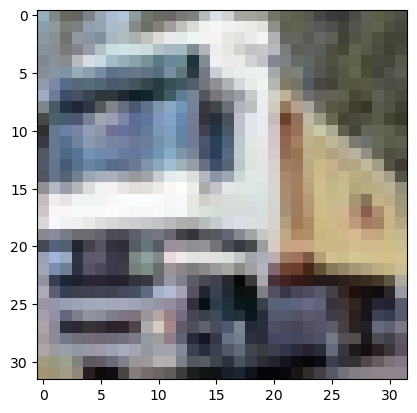

In [10]:
plt.imshow(decoded_img.reshape(32,32,3))

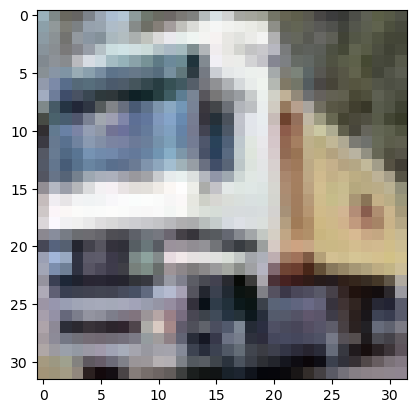

In [11]:
plt.imshow(x_train_scaled[1])

## 2. Using Fashion Mnist

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [13]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [14]:
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

In [15]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [17]:
from keras import layers, models

input_shape = (28,28,1)

input = layers.Input(input_shape)
encoder1 = layers.Dense(600, activation='relu')(input)
encoder2 = layers.Dense(300, activation='relu')(encoder1)
encoder3 = layers.Dense(100, activation='relu')(encoder2)

decoder1 = layers.Dense(300, activation='relu')(encoder3)
decoder2 = layers.Dense(600, activation='relu')(decoder1)
output = layers.Dense(1, activation='relu')(decoder2)

DAE = models.Model(input, output)
DAE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
DAE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense_12 (Dense)            (None, 28, 28, 600)       1200      
                                                                 
 dense_13 (Dense)            (None, 28, 28, 300)       180300    
                                                                 
 dense_14 (Dense)            (None, 28, 28, 100)       30100     
                                                                 
 dense_15 (Dense)            (None, 28, 28, 300)       30300     
                                                                 
 dense_16 (Dense)            (None, 28, 28, 600)       180600    
                                                                 
 dense_17 (Dense)            (None, 28, 28, 1)         601 

In [18]:
x_train_noisy = x_train_scaled + np.random.normal(0,1,size=(x_train_scaled.shape[0], 28,28,1))
x_test_noisy = x_test_scaled + np.random.normal(0,1,size=(x_test_scaled.shape[0], 28,28,1))

In [19]:
history = DAE.fit(x_train_noisy, x_train_scaled, validation_data = [x_test_noisy, x_test_scaled], batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.1102 - val_mean_squared_error: 0.1102
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.1103 - val_mean_squared_error: 0.1103


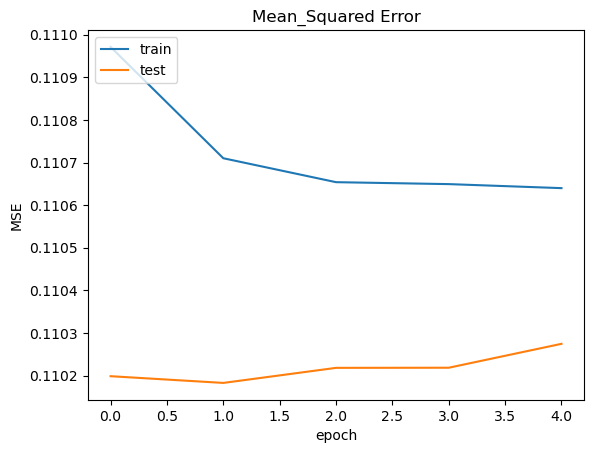

In [20]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean_Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

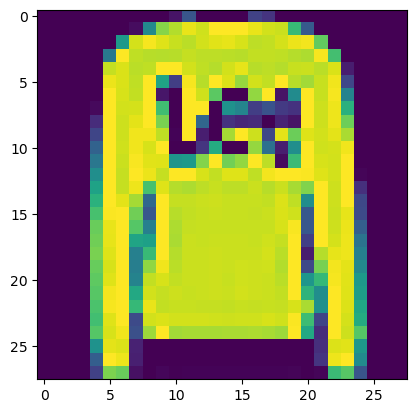

In [21]:
plt.imshow(x_test_scaled[1].reshape(28,28,1))

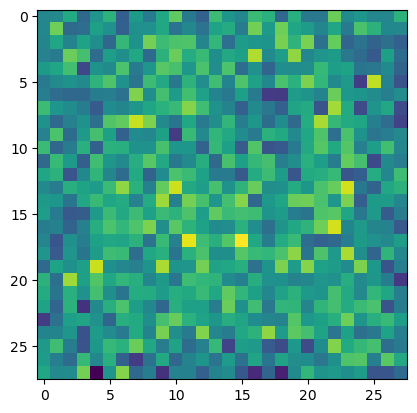

In [22]:
plt.imshow(x_test_noisy[1].reshape(28,28,1))

1/1 [==============================] - 0s 137ms/step


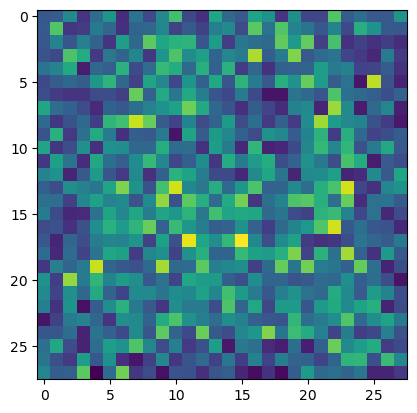

In [23]:
decoded_img = DAE.predict(x_test_noisy[1].reshape(1,28,28))
plt.imshow(decoded_img.reshape(28,28))